# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Data

In [2]:
data = pd.read_csv("drive/MyDrive/titanicSurvival/train.csv", index_col='PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Pre-processing, EDA, Feature Engineering, Scaling & Selection

In [3]:
df = data.copy()

## Dropping Unwanted columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
df.drop_duplicates(inplace=True)
df.drop(columns=['Cabin','Name'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [7]:
tmp = df.select_dtypes('object')
tmp

,Sex,Ticket,Embarked
PassengerId,,,
1,male,A/5 21171,S
2,female,PC 17599,C
3,female,STON/O2. 3101282,S
4,female,113803,S
5,male,373450,S
...,...,...,...
887,male,211536,S
888,female,112053,S
889,female,W./C. 6607,S


In [8]:
# Value Counts
tmp['Sex'].value_counts()  # there is a good class two class/catagory only

male      577
female    314
Name: Sex, dtype: int64

In [9]:
# there are too many catagories/class in this variable, so we will drop this 
tmp['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [10]:
# df.drop(columns=['Ticket',], inplace=True) # already drop once by sudden double click

In [11]:
tmp['Embarked'].value_counts() # only three category, its also usable. 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,S
888,1,1,female,19.0,0,0,112053,30.0000,S
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S


##| Type Correction/ Converting str into numerical values

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S


In [14]:
df.select_dtypes('object')

,Sex,Ticket,Embarked
PassengerId,,,
1,male,A/5 21171,S
2,female,PC 17599,C
3,female,STON/O2. 3101282,S
4,female,113803,S
5,male,373450,S
...,...,...,...
887,male,211536,S
888,female,112053,S
889,female,W./C. 6607,S


In [15]:
df.select_dtypes('object').columns

Index(['Sex', 'Ticket', 'Embarked'], dtype='object')

In [16]:
df.Sex

PassengerId
1        male
2      female
3      female
4      female
5        male
        ...  
887      male
888    female
889    female
890      male
891      male
Name: Sex, Length: 891, dtype: object

In [17]:
df.Sex.astype('category').cat.codes

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Length: 891, dtype: int8

In [18]:
for objcol in df.select_dtypes('object').columns:
  df[objcol] = df[objcol].astype('category').cat.codes

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,523,7.2500,2
2,1,1,0,38.0,1,0,596,71.2833,0
3,1,3,0,26.0,0,0,669,7.9250,2
4,1,1,0,35.0,1,0,49,53.1000,2
5,0,3,1,35.0,0,0,472,8.0500,2


## Treat Missing Values

In [20]:
df.info()  # see the missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int16  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int8   
dtypes: float64(2), int16(1), int64(4), int8(2)
memory usage: 52.2 KB


In [21]:
df.isnull()   # check whether is null or not

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False
889,False,False,False,True,False,False,False,False,False


In [22]:
df.isnull().sum()  # get the col wise null value

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [23]:
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Sex,891.0,0.647587,0.477990,0.00,0.0000,1.0000,1.0,1.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Ticket,891.0,338.528620,200.850657,0.00,158.5000,337.0000,519.5,680.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Embarked,891.0,1.529742,0.800254,-1.00,1.0000,2.0000,2.0,2.0000


In [24]:
# imputing missing values
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputer.fit(X=df)


KNNImputer()

In [25]:
imputed_np = imputer.transform(df)
imputed_np

array([[  0.    ,   3.    ,   1.    , ..., 523.    ,   7.25  ,   2.    ],
       [  1.    ,   1.    ,   0.    , ..., 596.    ,  71.2833,   0.    ],
       [  1.    ,   3.    ,   0.    , ..., 669.    ,   7.925 ,   2.    ],
       ...,
       [  0.    ,   3.    ,   0.    , ..., 675.    ,  23.45  ,   2.    ],
       [  1.    ,   1.    ,   1.    , ...,   8.    ,  30.    ,   0.    ],
       [  0.    ,   3.    ,   1.    , ..., 466.    ,   7.75  ,   1.    ]])

In [26]:
imputed_df = pd.DataFrame(imputed_np, columns=df.columns, dtype=np.float16)
imputed_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,523.0,7.250000,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,596.0,71.312500,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,669.0,7.925781,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,49.0,53.093750,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,472.0,8.046875,2.0


In [27]:
imputed_df.isnull().sum()  # Recheck missing value for confirmation 

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## EDA

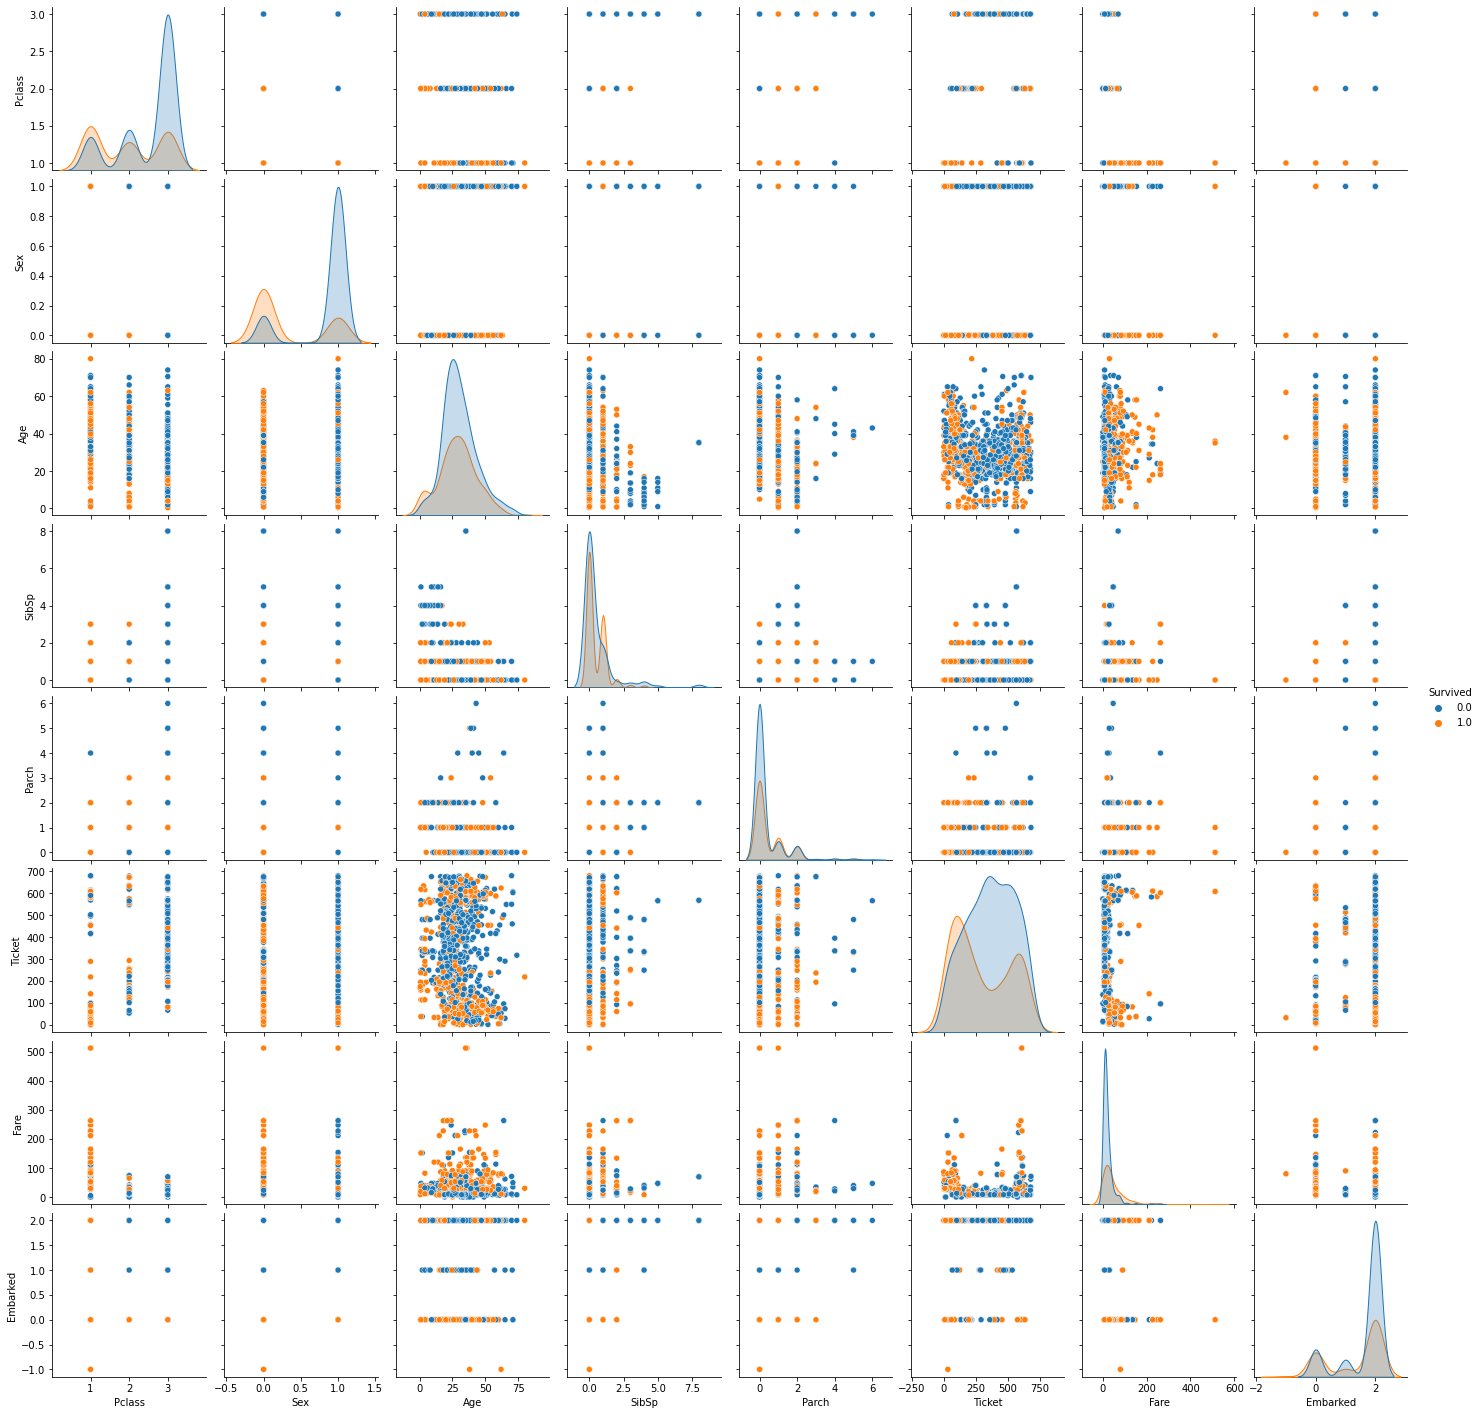

In [28]:
sns.pairplot(imputed_df, hue='Survived')  # not gettiing insightful info by this viz, check the balanced dataset

## Handling Imbalanced Dataset

In [29]:
imputed_df.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [30]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

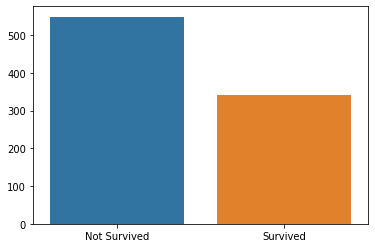

In [31]:
sns.barplot(x=['Not Survived', 'Survived'],y=imputed_df.Survived.value_counts().values)

In [32]:
over_sampler = RandomOverSampler(random_state=42)
features, target =over_sampler.fit_resample(imputed_df.drop(columns=['Survived']), imputed_df.Survived)

In [33]:
# features.head()  
features['Survived'] = target  # adding target with features
features.Survived.value_counts()   # now dataset is balanced

0.0    549
1.0    549
Name: Survived, dtype: int64

In [34]:
target

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1093    1.0
1094    1.0
1095    1.0
1096    1.0
1097    1.0
Name: Survived, Length: 1098, dtype: float16

## EDA

In [35]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,1098.0,2.250000,0.852539,1.000000,1.000000,3.0,3.000000,3.0
Sex,1098.0,0.587402,0.492432,0.000000,0.000000,1.0,1.000000,1.0
Age,1098.0,29.625000,13.414062,0.419922,21.000000,28.5,37.304688,80.0
SibSp,1098.0,0.518066,1.035156,0.000000,0.000000,0.0,1.000000,8.0
Parch,1098.0,0.390625,0.795898,0.000000,0.000000,0.0,1.000000,6.0
Ticket,1098.0,inf,inf,0.000000,139.000000,326.5,510.000000,680.0
Fare,1098.0,34.750000,inf,0.000000,7.925781,15.5,34.585938,512.5
Embarked,1098.0,1.505859,0.812500,-1.000000,1.000000,2.0,2.000000,2.0
Survived,1098.0,0.500000,0.500000,0.000000,0.000000,0.5,1.000000,1.0


In [36]:
features.groupby(by='Survived').mean()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,,,,,,,,
0.0,2.531250,0.852539,30.328125,0.553711,0.32959,364.50,22.12500,1.641602
1.0,1.966797,0.322510,28.906250,0.482666,0.45166,290.75,47.34375,1.370117


## Data Split

In [37]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(
    features.drop(columns=['Survived']), features.Survived, random_state=42, test_size=.25
)

## Feature Selection

In [38]:
features.drop(columns=['Survived'], inplace=True)

In [39]:
from sklearn.feature_selection import mutual_info_classif

In [40]:
scores = mutual_info_classif(xtrain, ytrain, n_neighbors=5, random_state=42)
scores = pd.DataFrame(scores, index=features.columns, columns=['Scores',])

In [41]:
scores = scores.sort_values(by='Scores', ascending=False)
scores

,Scores
Fare,0.159414
Ticket,0.147002
Sex,0.136709
Pclass,0.054543
Embarked,0.047049
Age,0.040883
SibSp,0.024371
Parch,0.000000


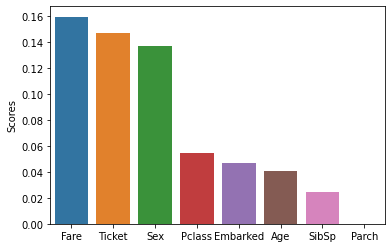

In [42]:
sns.barplot(data=scores, x=scores.index, y='Scores')

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
clf = RandomForestClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=45,
                       n_estimators=500, warm_start=True)         # after passing the best estimator here, you can alter something her over too, n_est=200 in primary best estimator
clf.fit(xtrain[['Fare','Ticket']], ytrain)

RandomForestClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=45,
                       n_estimators=500, warm_start=True)

In [81]:
# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay       

In [82]:
ypred = clf.predict(xtest[['Fare','Ticket']])
cm = confusion_matrix(ytest,ypred)

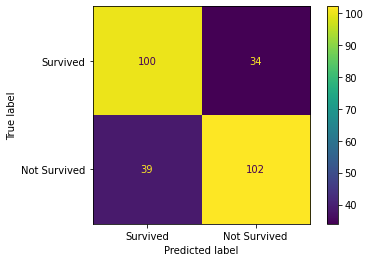

In [83]:
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survived', 'Not Survived'])
cmd.plot()

In [84]:
accuracy_score(ytest,ypred)

0.7345454545454545

In [49]:
RandomForestClassifier().get_params()   # check the model parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [50]:
params = {
    'bootstrap': [True,False],
    'criterion': ['gini','entropy'],
    'max_depth': [3, 9, 1],
    'max_features': ['auto','sqrt','log2'],
    'max_leaf_nodes': np.arange(25, 50, 5),
    'min_samples_split': np.arange(2, 20, 3),
    'n_estimators': [50, 100, 200],
    'warm_start': [True, False]
 }

In [51]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [52]:
grid = RandomizedSearchCV(clf, param_distributions=params, cv=10, scoring='accuracy')
grid.fit(features[['Fare','Ticket']], target)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=9,
                                                    max_leaf_nodes=45,
                                                    n_estimators=200,
                                                    warm_start=True),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 9, 1],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': array([25, 30, 35, 40, 45]),
                                        'min_samples_split': array([ 2,  5,  8, 11, 14, 17]),
                                        'n_estimators': [50, 100, 200],
                           

In [53]:
grid.best_estimator_

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=45,
                       min_samples_split=11, n_estimators=200)

In [54]:
grid.best_score_

0.7396246872393663

In [85]:
from sklearn.metrics import roc_curve, auc

In [95]:
ypred_prob = clf.predict_proba(xtest[['Fare','Ticket']])

In [102]:
fpr, tpr, thresh = roc_curve(ytest, ypred_prob[:,1])

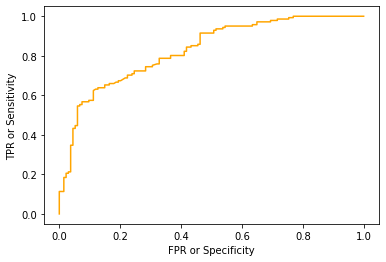

In [106]:
# ypred_prob
plt.plot(fpr, tpr, color ='orange')     # x=frp, y=trp
plt.ylabel("TPR or Sensitivity")
plt.xlabel("FPR or Specificity")
plt.show()